In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import pearsonr



%run Function.ipynb
%run Feature_preprocessing_function.ipynb


MLdata_path = r"/Users/bashirulazambiswas/Documents/Sadia/SUNY courses/2022_Fall/ICSI 518 Software Engineering/Project/Git/Learning-Machine-Learning/ML data/Station data"
result_path = r"/Users/bashirulazambiswas/Documents/Sadia/SUNY courses/2022_Fall/ICSI 518 Software Engineering/Project/Results"




In [10]:
n_components = []
for station in station_list:
    print(station)
    data = import_station_data(MLdata_path,station)
    data.time = time_coversion(data.time)
    features = data.columns.drop(['station','time'])    
    from sklearn.preprocessing import StandardScaler
    x = data[features].dropna(how='all',axis=1)
    N = len(x.columns)
    if N<(len(features)):
        continue
    x = x.dropna().values
    x = StandardScaler().fit_transform(x)
    from sklearn.decomposition import PCA
    pca = PCA(n_components='mle').fit(x)
    n_components = n_components+[pca.n_components_]
    
#     break

ADDI
ANDE
BATA
BEAC
BELD
BELL
BELM
BERK
BING
BKLN
BRAN
BREW
BROC
BRON
BROO
BSPA
BUFF
BURD
BURT
CAMD
CAPE
CHAZ
CHES
CINC
CLAR
CLIF
CLYM
COBL
COHO
COLD
COPA
COPE
CROG
CSQR
DELE
DEPO
DOVE
DUAN
EAUR
EDIN
EDWA
ELDR
ELLE
ELMI
ESSX
FAYE
FRED
GABR
GFAL
GFLD
GROT
GROV
HAMM
HARP
HARR
HART
HERK
HFAL
ILAK
JOHN
JORD
KIND
LAUR
LOUI
MALO
MANH
MEDI
MEDU
MORR
NBRA
NEWC
NHUD
OLDF
OLEA
ONTA
OPPE
OSCE
OSWE
OTIS
OWEG
PENN
PHIL
PISE
POTS
QUEE
RAND
RAQU
REDF
REDH
ROXB
RUSH
SARA
SBRI
SCHA
SCHO
SCHU
SCIP
SHER
SOME
SOUT
SPRA
SPRI
STAT
STEP
STON
SUFF
TANN
TICO
TULL
TUPP
TYRO
VOOR
WALL
WALT
WANT
WARS
WARW
WATE
WBOU
WELL
WEST
WFMB
WGAT
WHIT
WOLC
YORK


In [11]:
station_info = pd.read_csv(MLdata_path+"/station details.csv")
station_list = station_info.stid.values

n_components_corr = []

for station in station_list:
    x,y = preprocess(MLdata_path,station,'temperature')
    n_components_corr = n_components_corr + [len(x.columns)-1]


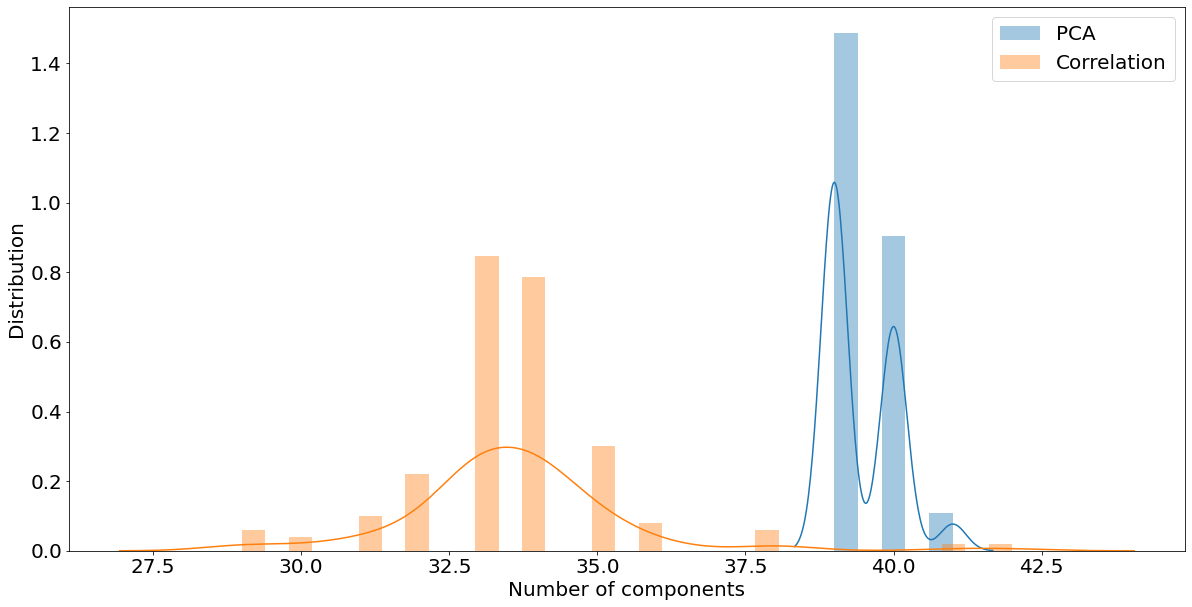

In [13]:
plt.figure(figsize=(20,10))
sns.distplot(n_components, label='PCA')
sns.distplot(n_components_corr,label='Correlation')
plt.xlabel("Number of components",fontsize=20)
plt.ylabel("Distribution",fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.savefig(result_path+"/Distribution of components with correlation.png")